<IPython.core.display.Javascript object>


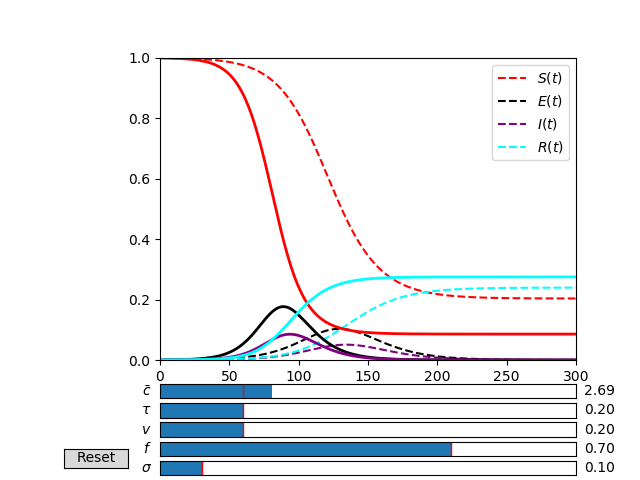

In [1]:
#Author:  Ryan Florida
#Purpose: This program will first solve a coupled system of differential
#         equations (SEIR model for Ebola), then allow the user to adjust
#         the parameter values to see how each paramter affects the solution
#         of the system.
%matplotlib notebook
from matplotlib.widgets import Slider, Button
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt

# The following function makes a vector of differential equations to represent the
# coupled system of differential equations. The *args parameter allows the
# function to accept a variable number of arguments, which is conventient for our
# purposes. Inside the dydt list, enter each differential equation as its own
# entry and note that order does matter.
def DESys(y, *args):
    S, E, I, R = y
    dydt = [-beta*S*I, beta*S*I-sigma*E, sigma*E-v*I, v*(1-f)*I]
    return dydt

# The following function defines the action(s) to take when the graph sliders
# are varied.
def sliders(val):
    global beta
    global sigma
    global v
    global f
    #Set new values for global variables.
    (beta, sigma, v, f) = (c_slider.val*tau_slider.val, sigma_slider.val,
     v_slider.val, f_slider.val)
    #Change y-values.
    line0.set_ydata(odeint(DESys, y0, t, args=(beta, sigma, v, f))[:,0])
    line1.set_ydata(odeint(DESys, y0, t, args=(beta, sigma, v, f))[:,1])
    line2.set_ydata(odeint(DESys, y0, t, args=(beta, sigma, v, f))[:,2])
    line3.set_ydata(odeint(DESys, y0, t, args=(beta, sigma, v, f))[:,3])
    fig.canvas.draw_idle()

# The following function resets each slider upon press of the 'Reset' button.
def reset_button_action(mouse_event):
    c_slider.reset()
    tau_slider.reset()
    f_slider.reset()
    v_slider.reset()
    sigma_slider.reset()


###############################################################################
# Here we will define all of our paramters. *NOTE THAT THESE ARE GLOBAL*
tau   = 0.2
c     = 2.0
beta  = tau*c
sigma = 0.1
v     = 0.2
f     = 0.7

# Here is a list containing our initial conditions, remember that order matters.
y0 = [0.999, 0.0002, 0.0002, 0.0006]

# Here we will let the time vary from 0 to 300 with 1000 points defined.
t = np.linspace(0, 300, 1000)

# soln will represent the vector of solutions, the system will be solved using
# SciPy's odeint method.
soln = odeint(DESys, y0, t, args=(beta, sigma, v, f))


# Create a figure to plot.
fig = plt.figure()
ax  = fig.add_subplot(111)
# Adjust the plotting region to make room for sliders and button.
fig.subplots_adjust(left=0.25, bottom=0.25)

# Draw the initial plot (as dashed lines) so it will stick around as the
# sliders are varied.
ax.plot(t, soln[:,0],'r--', label = '$S(t)$')
ax.plot(t, soln[:,1],'k--', label = '$E(t)$')
ax.plot(t, soln[:,2],c='purple',linestyle='--', label = '$I(t)$')
ax.plot(t, soln[:,3],c='cyan',linestyle='--', label = '$R(t)$')
[line0] = ax.plot(t, soln[:, 0], linewidth=2, color='red')
[line1] = ax.plot(t, soln[:, 1], linewidth=2, color='black')
[line2] = ax.plot(t, soln[:, 2], linewidth=2, color='purple')
[line3] = ax.plot(t, soln[:, 3], linewidth=2, color='cyan')
ax.set_xlim([0, 300])
ax.set_ylim([0, 1.0])


# Place sliders on graph (one for each parameter).
c_slider_ax  = fig.add_axes([0.25, 0.17, 0.65, 0.03])
c_slider     = Slider(c_slider_ax, '$\\bar{c}$', 0.0, 10.0, valinit=c)

tau_slider_ax = fig.add_axes([0.25, 0.13, 0.65, 0.03])
tau_slider    = Slider(tau_slider_ax, '$\\tau$', 0.0, 1.0, valinit=tau)

v_slider_ax = fig.add_axes([0.25, 0.09, 0.65, 0.03])
v_slider    = Slider(v_slider_ax, '$v$', 0.0, 1.0, valinit=v)

f_slider_ax = fig.add_axes([0.25, 0.05, 0.65, 0.03])
f_slider    = Slider(f_slider_ax, '$f$', 0.0, 1.0, valinit=f)

sigma_slider_ax = fig.add_axes([0.25, 0.01, 0.65, 0.03])
sigma_slider    = Slider(sigma_slider_ax, '$\sigma$', 0.0, 1.0, valinit=sigma)

# Call sliders function for each slider.
c_slider.on_changed(sliders)
tau_slider.on_changed(sliders)
f_slider.on_changed(sliders)
v_slider.on_changed(sliders)
sigma_slider.on_changed(sliders)

# Add a button for resetting the parameters.
reset_button_ax = fig.add_axes([0.1, 0.025, 0.1, 0.04])
reset_button    = Button(reset_button_ax, 'Reset')

# Call reset button function.
reset_button.on_clicked(reset_button_action)
# Show plot with legend.
ax.legend()
plt.show()